# Mercedes-Benz Kaggle Competition Exploratory Data Analysis (2017)

## March 3, 2018

## Hiro Miyake

This notebook deals with data provided in the [Mercedes-Benz Kaggle competition](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing) held in 2017. Modeling is performed in the companion notebook.

# 1. Load modules and data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

#from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

# 2. First look at the data

In [3]:
print train.shape
train.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print test.shape
test.head()

(4209, 377)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


We are predicting the continuous variable `y` in the training data.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [6]:
print 'Total number of numerical columns: ' + str(len(train.describe().columns))
train.describe()

Total number of numerical columns: 370


,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are 376 independent variables. Of those, 8 are categorical and 368 are numerical. The numerical variables appear to take on only values of 0 or 1.

Some sort of dimensionality reduction will probably be appropriate to cull many of the 0/1 variables.

# 3. Closer look at the target variable

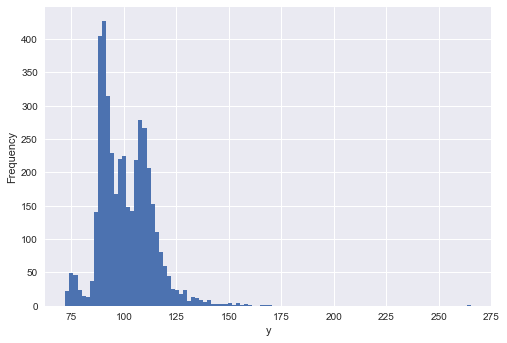

In [7]:
train['y'].plot(kind='hist', bins = 100)
plt.xlabel('y')
plt.show()

Let's look at the summary statistics for the target variable `y`.

In [8]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

It looks like there are outliers at the high end.

# 4. Look at the categorical variables

First, I combine the training and test sets.

In [9]:
data = pd.concat([train.drop('y', axis = 1), test], axis = 0)

## Note that in the above concatenation step, the indices are unchanged
## To reset the indices so that they make sense, take the tip from the following link
## and use the following line of code
## https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects
data.reset_index(inplace=True, drop=True)

data.head(10)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0
5,18,t,b,e,c,d,g,h,s,0,...,0,0,1,0,0,0,0,0,0,0
6,24,al,r,e,f,d,f,h,s,0,...,0,0,0,0,0,0,0,0,0,0
7,25,o,l,as,f,d,f,j,a,0,...,0,0,0,0,0,0,0,0,0,0
8,27,w,s,as,e,d,f,i,h,0,...,1,0,0,0,0,0,0,0,0,0
9,30,j,b,aq,c,d,f,a,e,0,...,0,0,1,0,0,0,0,0,0,0


Take a subset of those that are categorical variables.

In [10]:
col_num = list(data.describe().columns)
data_cat = data.copy()
for i in col_num:
    if i != 'ID':
        data_cat.drop(i, axis = 1, inplace = True)
data_cat.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8
0,0,k,v,at,a,d,u,j,o
1,6,k,t,av,e,d,y,l,o
2,7,az,w,n,c,d,x,j,x
3,9,az,t,n,f,d,x,l,e
4,13,az,v,n,f,d,h,d,n


In [11]:
catnum = 0
for i in data_cat:
    if i != 'ID':
        print 'Number of unique ' + i + ' values: ' + str(len(data_cat[i].unique()))
        catnum += len(data_cat[i].unique())
print 'Total number of categorical levels: ' + str(catnum)

Number of unique X0 values: 53
Number of unique X1 values: 27
Number of unique X2 values: 50
Number of unique X3 values: 7
Number of unique X4 values: 4
Number of unique X5 values: 33
Number of unique X6 values: 12
Number of unique X8 values: 25
Total number of categorical levels: 211


There are 8 categorical columns with a total of 211 categorical levels. Combine that with 368 numerical variables, we have 579 variables. That is not too much, so we could start with that many variables in our model and see how we do.

Let's see how the levels are distributed among each categorical variable. There are 8 categorical variables, so we can arrange this in a 3 by 3 histogram plot.

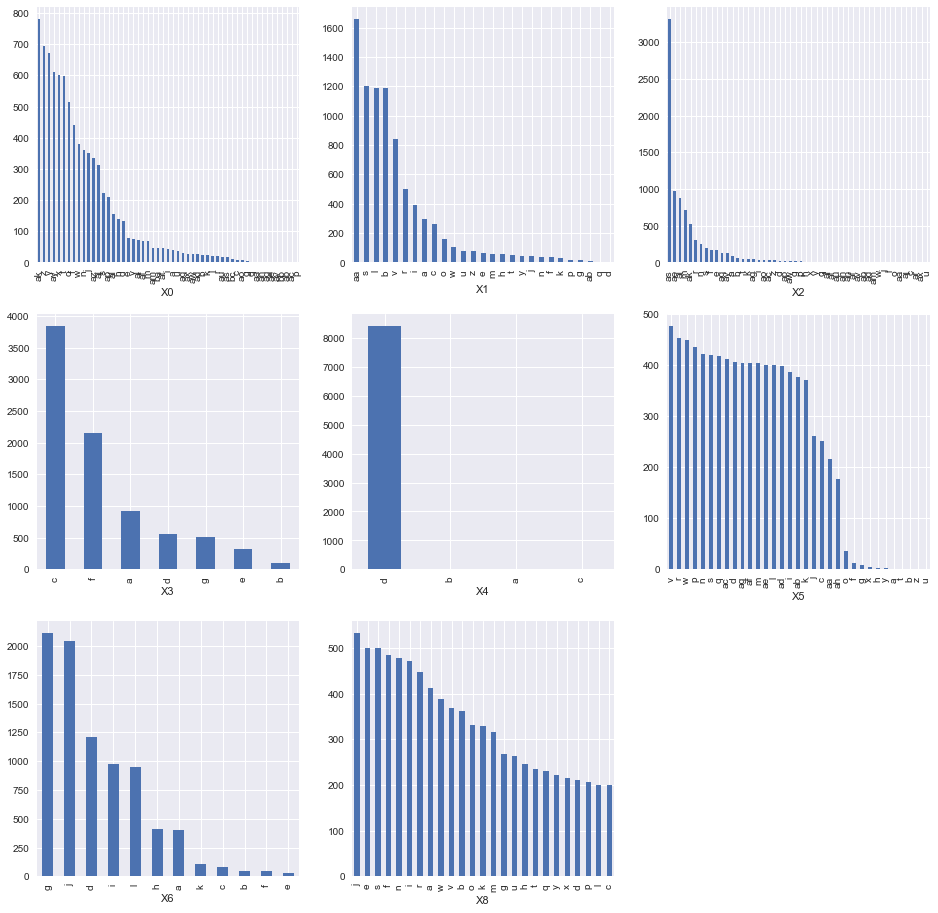

In [12]:
j = 1
figwidth = 16
figheight = 16
plt.rcParams["figure.figsize"] = [figwidth, figheight]
for i in data_cat:
    if i != 'ID':
        #print i
        #if j > 4:
        #    break
        plt.subplot(3,3,j)
        data_cat[i].value_counts().plot(kind='bar')
        plt.xlabel(i)
        j += 1
plt.show()

The variable `X4` seems to have a very skewed distribution. Take a closer look.

In [13]:
data_cat['X4'].value_counts()

d    8408
b       5
a       3
c       2
Name: X4, dtype: int64

# 5. Further exploratory data analysis

Beyond our univariate EDA, it may be fruitful to look at pair-wise relationships of the variables. It is also almost certainly fruitful to perform feature engineering.